In [2]:
## Importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['IMG_3136.JPG', 'IMG_3163.JPG', 'IMG_3149.JPG', 'IMG_3131.JPG', 'IMG_3103.JPG', 'IMG_3083.JPG', 'IMG_3096.JPG', 'IMG_3134.JPG', 'IMG_3082_cropped.png', 'IMG_3084.JPG', 'IMG_3088.JPG', 'IMG_3061.JPG', 'IMG_3128.JPG', 'IMG_3069.JPG', 'IMG_3155.JPG']


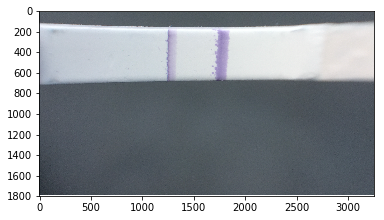

In [3]:
img = cv2.imread('../input/IMG_3082_cropped.png')
plt.imshow(img)

In [67]:
## take this image as the input to our first function

def extract_white_strip(image):
    ## first convert the image format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
     # HSV separates luma, or the image intensity, from chroma or the color information.
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    ## convert RGB to gray
    ##image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ## creating the mask
    mini = np.array([255,255,0])
    maxi = np.array([255,255, 102])
    mask1 = cv2.inRange(image_hsv, mini, maxi)

    
    ## Thresholding the image
    ret, thresh2 = cv2.threshold(image_hsv, 127, 255, cv2.THRESH_BINARY)

    
    
    
    ## find the biggest rectangle
    biggest_contour = find_biggest_contour(thresh2)
    
    overlay = overlay_mask(mask1, image)
    
    ## 
    final_image , dimension = rectangle_contour(overlay, biggest_contour)
    print(dimension)
    plt.imshow(final_image)
    

In [68]:
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    
    return img
    

In [69]:
def find_biggest_contour(image):
    # Copy
    image = image.copy()
    ## converting the image in the proper form 
    rgbimg = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    the = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    
    we, contours, hierarchy = cv2.findContours(the, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    
    return biggest_contour

In [70]:
def rectangle_contour(image, contour):
    image_rect = image.copy()
    x,y,w,h = cv2.boundingRect(contour)
    image_rect = cv2.rectangle(image_rect, (x,y), (x+w,y+h), (0,255,0), 2)
    ## extract the white strip
    crop_img = image_rect[y:y+h, x:x+w]
    dimension = (x,y,x+w,y+h)
    return crop_img , dimension

    

(0, 97, 3256, 717)


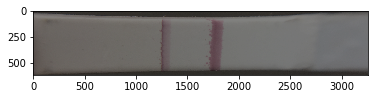

In [71]:
extract_white_strip(img)

(0, 675, 3264, 1323)


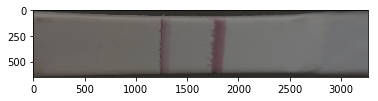

In [81]:
## try some other images
image1 = cv2.imread('../input/IMG_3061.JPG')
extract_white_strip(image1)

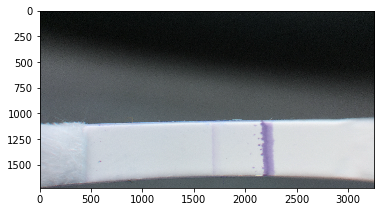

In [82]:
image2 = cv2.imread('../input/IMG_3134.JPG')
plt.imshow(image2)

(0, 1037, 3256, 1719)


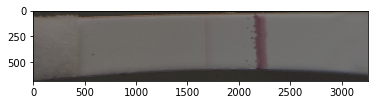

In [83]:
extract_white_strip(image2)

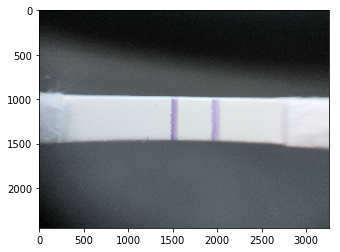

In [84]:
img3 = cv2.imread('../input/IMG_3103.JPG')
plt.imshow(img3)

(0, 902, 3264, 1564)


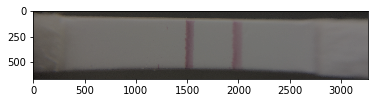

In [85]:
extract_white_strip(img3)